<a href="https://colab.research.google.com/github/DevilNReality/KMeans-Customer-Clustering/blob/main/Code%20File/K_Means_Customer_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset And Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.simplefilter(action = 'ignore')

In [ ]:
dataset = pd.read_excel('/content/cust_data.xlsx')

In [ ]:
dataset.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

# Data Preparation

## Label Encoding

In [ ]:
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])

## Imputation of Data

In [ ]:
dataset['Gender'] = np.where(dataset['Gender'].isna() , dataset['Gender'].mode(dropna = True)[0] , dataset['Gender'])
dataset.drop(['Cust_ID'] , inplace = True , axis = 1)

# Exploratory Data Analysis

In [ ]:
dataset.describe()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.355667,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,0.640922,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


<Axes: >

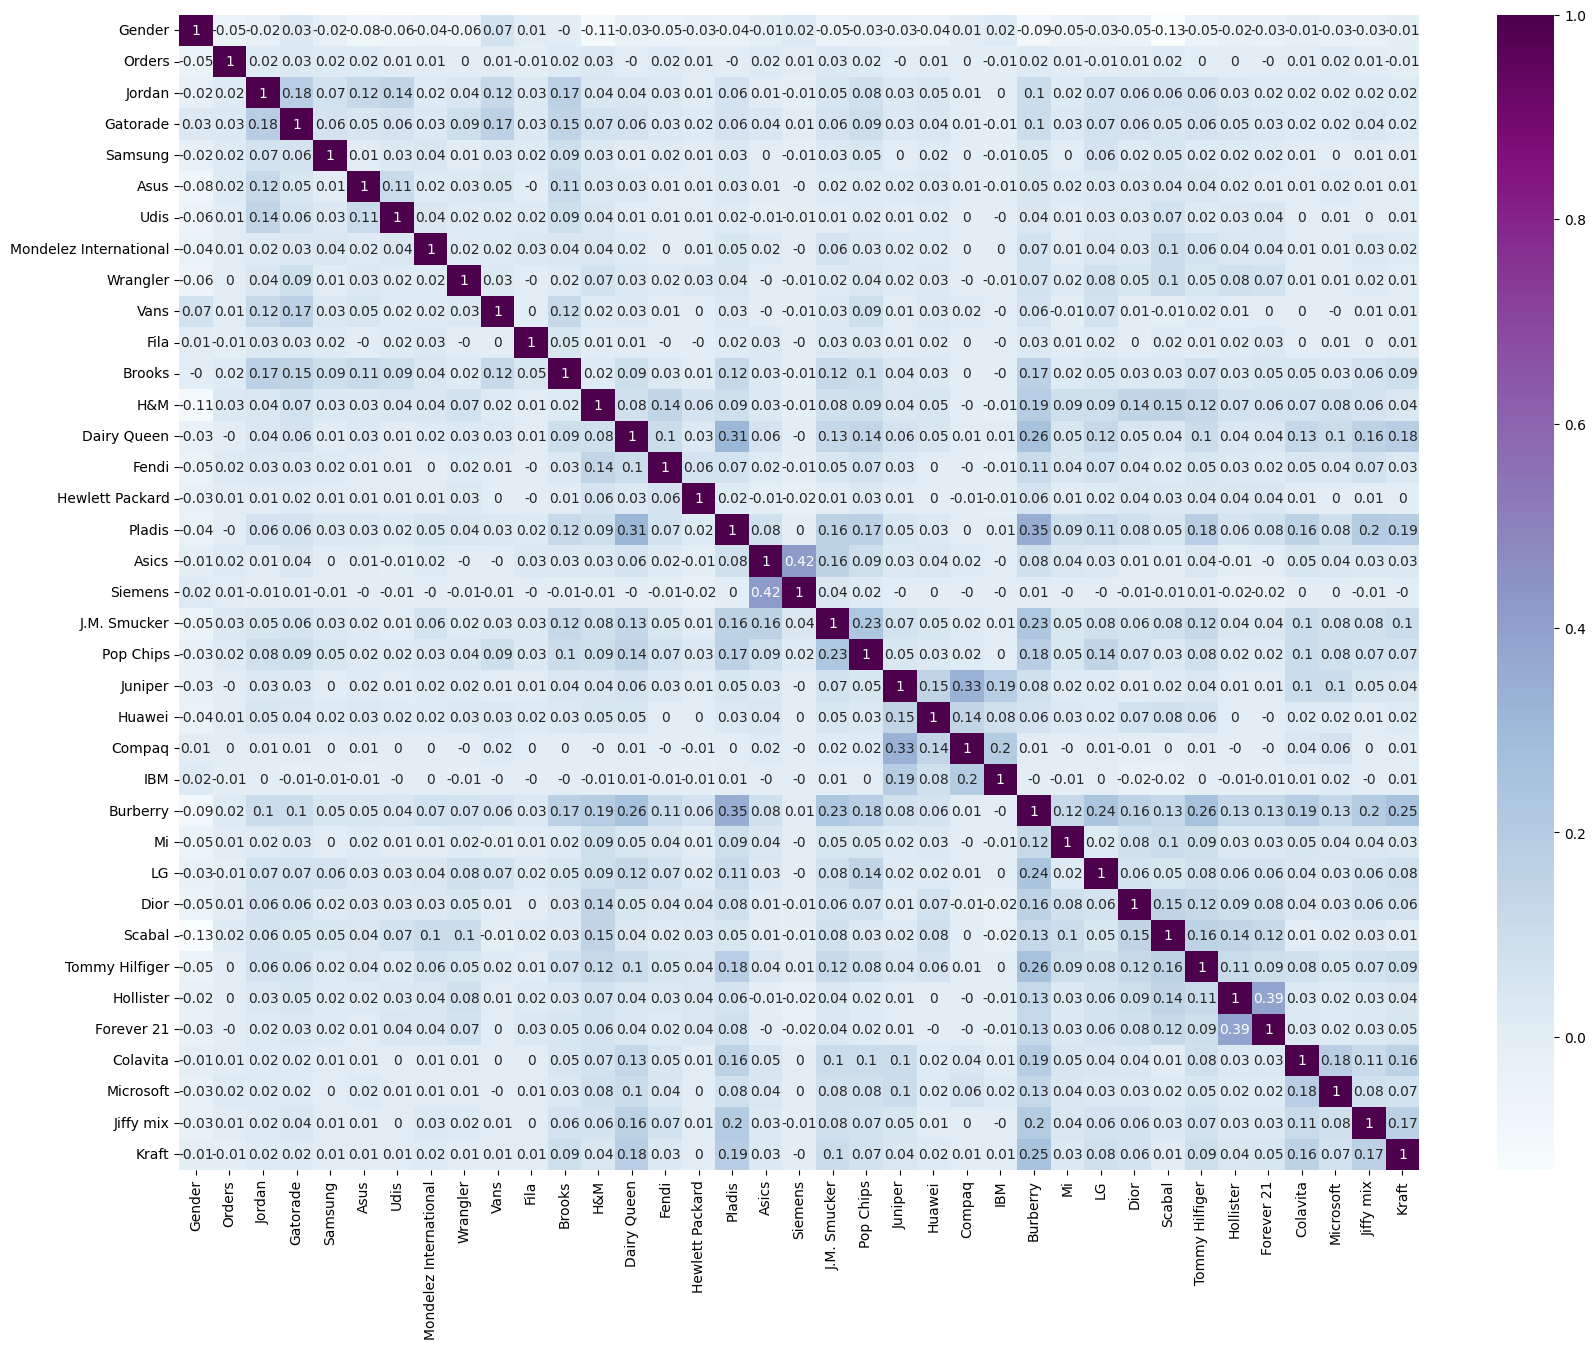

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(round(dataset.corr(),2), annot=True, cmap='BuPu')

# K Means Clustering

## Elbow Method

In [ ]:
inertia = []
for i in range(1 , 12):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(dataset)
  inertia.append(kmeans.inertia_)

<function matplotlib.pyplot.show(close=None, block=None)>

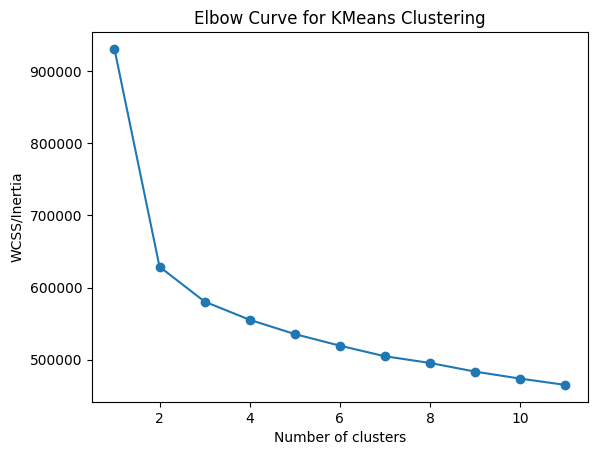

In [ ]:
plt.plot( range(1,12) , inertia , 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS/Inertia')
plt.title('Elbow Curve for KMeans Clustering')
plt.show

In [ ]:
kmeans = KMeans(n_clusters = 4 , random_state = 123)
kmeans.fit(dataset)
dataset['Cluster'] = kmeans.labels_

In [ ]:
dataset.head()

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,7,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,3
2,1,7,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,10,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


<Axes: xlabel='Cluster'>

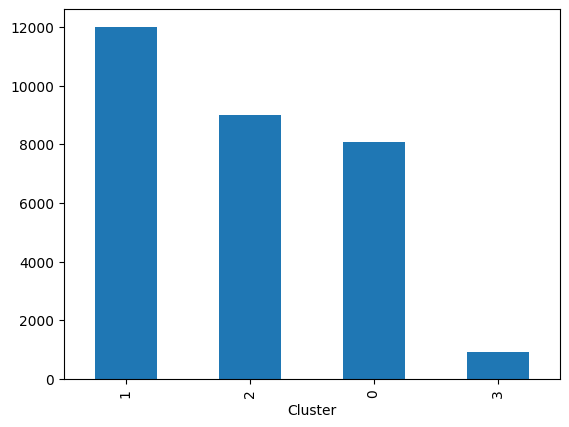

In [ ]:
dataset['Cluster'].value_counts().plot(kind = 'bar')

In [ ]:
average_purchases = dataset.groupby('Cluster').mean(numeric_only = True)
average_purchases

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.331602,4.465628,0.271637,0.264466,0.236894,0.165059,0.143793,0.142804,0.107567,0.105589,...,0.074060,0.252349,0.363749,0.133531,0.078511,0.056256,0.164070,0.109916,0.075915,0.054896
1,0.403183,0.601483,0.230795,0.204299,0.195051,0.139810,0.133228,0.124813,0.096567,0.094818,...,0.091151,0.250792,0.340360,0.135311,0.067405,0.049908,0.162890,0.096234,0.067822,0.056491
2,0.328260,8.757498,0.267940,0.267496,0.229949,0.169296,0.145523,0.139747,0.104977,0.112975,...,0.091757,0.269162,0.381360,0.152188,0.073317,0.053210,0.180515,0.111642,0.085314,0.058431
3,0.213656,3.218062,0.709251,0.628855,0.397577,0.333700,0.257709,0.310573,0.257709,0.367841,...,0.613436,0.726872,0.707048,0.765419,0.248899,0.205947,0.946035,0.486784,0.490088,0.527533


In [ ]:
average_purchases.to_csv('average_purchases.csv' , index = False)

# Evaluation Of Clusters

In [ ]:
kmeans.cluster_centers_

array([[0.33160237, 4.46562809, 0.27163699, 0.26446588, 0.23689416,
        0.16505935, 0.14379327, 0.14280415, 0.10756677, 0.10558853,
        0.08741345, 0.12178536, 0.31602374, 0.12487636, 0.13761128,
        0.15207715, 0.07245302, 0.29018299, 0.04488131, 0.68261622,
        0.21636993, 0.40529179, 0.26186944, 0.10670129, 0.03227003,
        0.32801682, 0.11535608, 0.07406034, 0.25234916, 0.36374876,
        0.13353116, 0.07851137, 0.05625618, 0.16407023, 0.10991592,
        0.07591494, 0.05489614],
       [0.4031828 , 0.60148309, 0.23079487, 0.20429928, 0.19505082,
        0.13981003, 0.1332278 , 0.12481253, 0.09656724, 0.09481753,
        0.09773371, 0.11931345, 0.27395434, 0.12706216, 0.11673054,
        0.15289118, 0.06848859, 0.23529412, 0.04165972, 0.62556241,
        0.1962173 , 0.38468589, 0.22721213, 0.10639893, 0.02991168,
        0.29211798, 0.10731545, 0.09115147, 0.25079153, 0.34035994,
        0.13531078, 0.06740543, 0.04990835, 0.16288952, 0.09623396,
        0.06782

In [ ]:
kmeans.n_iter_

18

In [ ]:
print(round(silhouette_score(dataset , kmeans.fit_predict(dataset)),2))

0.22


In [ ]:
average_purchases = dataset.groupby('Cluster').mean(numeric_only = True)
average_purchases

,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.331602,4.465628,0.271637,0.264466,0.236894,0.165059,0.143793,0.142804,0.107567,0.105589,...,0.074060,0.252349,0.363749,0.133531,0.078511,0.056256,0.164070,0.109916,0.075915,0.054896
1,0.403183,0.601483,0.230795,0.204299,0.195051,0.139810,0.133228,0.124813,0.096567,0.094818,...,0.091151,0.250792,0.340360,0.135311,0.067405,0.049908,0.162890,0.096234,0.067822,0.056491
2,0.328260,8.757498,0.267940,0.267496,0.229949,0.169296,0.145523,0.139747,0.104977,0.112975,...,0.091757,0.269162,0.381360,0.152188,0.073317,0.053210,0.180515,0.111642,0.085314,0.058431
3,0.213656,3.218062,0.709251,0.628855,0.397577,0.333700,0.257709,0.310573,0.257709,0.367841,...,0.613436,0.726872,0.707048,0.765419,0.248899,0.205947,0.946035,0.486784,0.490088,0.527533
